####  **Import Libraries and Required Packages**

In [ ]:
# Run this first in Google Colab
!pip install qiskit qiskit-aer pylatexenc matplotlib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt

# Check installation
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.3


#### **Part A - Building & Visualizing Single and Multi-Qubit Circuits**



##### **Simple Circuit Builder**

In [ ]:
# Single qubit
qc1 = QuantumCircuit(1, 1)
qc1.h(0)  # Superposition
qc1.measure(0, 0)
qc1.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

A single qubit circuit demonstrates the fundamental concept of **superposition**. We'll use the Hadamard gate (H) to create an equal superposition of |0⟩ and |1⟩ states.

- Circuit Components:
  - **1 Qubit**: Quantum bit that can exist in superposition
  - **1 Classical bit**: For measurement storage
  - **H Gate**: Creates superposition state (|0⟩ + |1⟩)/√2
  - **Measurement**: Collapses the superposition to either |0⟩ or |1⟩

In [ ]:
# Two qubits
qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.h(0)
qc2.cx(0, 1)
qc2.measure_all()
qc2.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

The two-qubit circuit introduces **quantum entanglement** using the CNOT gate. This creates correlations between qubits that cannot exist in classical systems.

- Circuit Components:
  - **X Gate**: Bit flip gate (NOT operation)
  - **H Gate**: Creates superposition on control qubit
  - **CX Gate (CNOT)**: Controlled-NOT creates entanglement
  - **Result**: Entangled state where qubits are correlated

#####  **Using Loops for Multiple Qubits**

In [ ]:
# Three qubits with loop
qc3 = QuantumCircuit(3)
for i in range(2):
    qc3.h(i)
    qc3.rz(np.pi/(i+2), i)
qc3.cx(0, 2)
qc3.cx(1, 2)
qc3.measure_all()
qc3.draw()

┌───┐┌─────────┐           ░ ┌─┐      
   q_0: ┤ H ├┤ Rz(π/2) ├──■────────░─┤M├──────
        ├───┤├─────────┤  │        ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Rz(π/3) ├──┼────■───░──╫─┤M├───
        └───┘└─────────┘┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ────────────────┤ X ├┤ X ├─░──╫──╫─┤M├
                        └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════╩══╩══╩═
                                      0  1  2

This circuit demonstrates **rotation gates** that allow fine control over quantum states by rotating them around specific axes on the Bloch sphere.

- Circuit Components:
  - **H Gates**: Create superposition on qubits 0 and 1
  - **RZ Gates**: Rotation around Z-axis by specified angles
    - RZ(π/2): 90-degree rotation on qubit 0
    - RZ(π/3): 60-degree rotation on qubit 1
  - **CX Gates**: Create multi-qubit entanglement
    - First CNOT: Control qubit 0, target qubit 2
    - Second CNOT: Control qubit 1, target qubit 2
  - **Result**: Complex quantum state with phase differences


In [ ]:
# Four qubits - GHZ alternative
qc4 = QuantumCircuit(4)
qc4.h(0)
for i in range(3):
    qc4.cx(i, i+1)
qc4.measure_all()
qc4.draw()

┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

The **Greenberger-Horne-Zeilinger (GHZ) state** is a maximally entangled state of multiple qubits. It represents the quantum superposition (|0000⟩ + |1111⟩)/√2.

- **Circuit Construction:**
  1. Apply H gate to first qubit: creates (|0⟩ + |1⟩)/√2
  2. Cascade CNOT gates: spreads the superposition
  3. Result: All qubits are either all |0⟩ or all |1⟩

- **Why GHZ States Matter:**
  - Demonstrates multi-particle entanglement
  - Used in quantum error correction
  - Important for quantum communication protocols
  - Shows non-classical correlations

##### **Visualization**

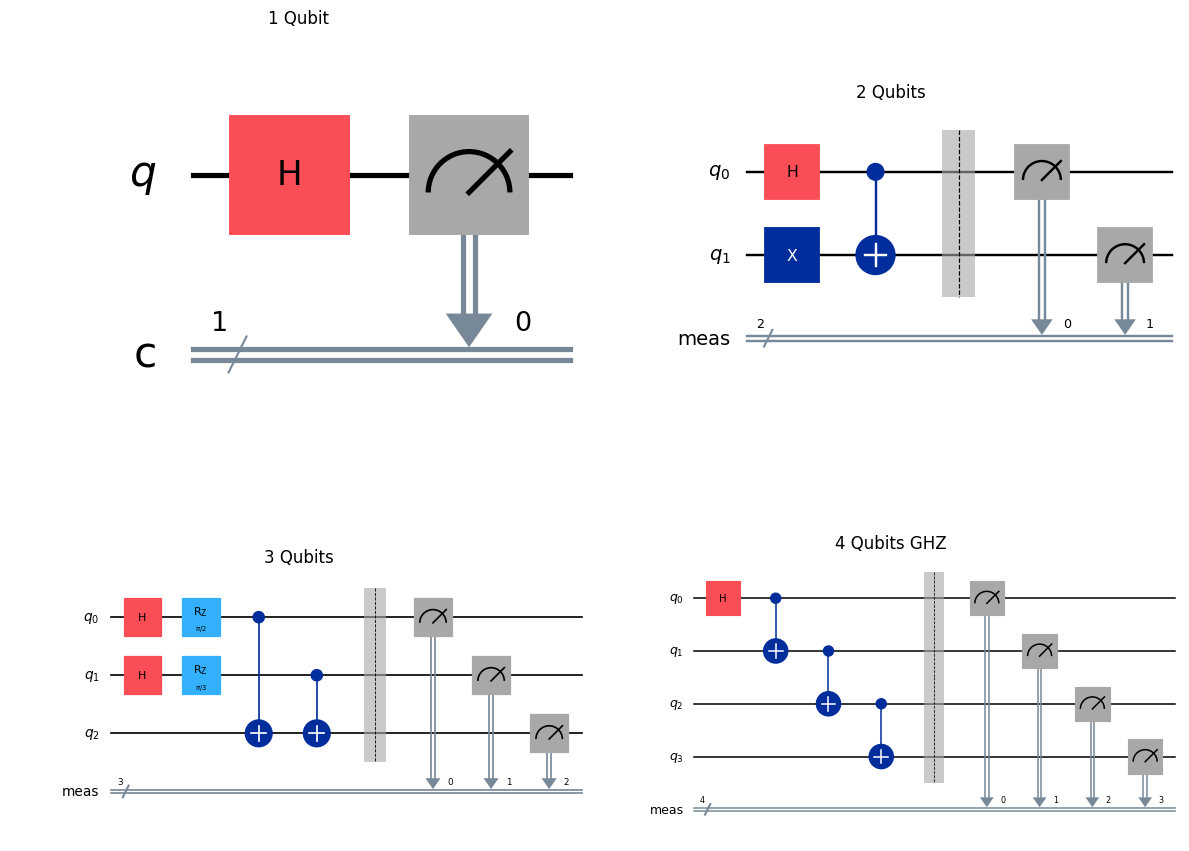

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
circuits = [qc1, qc2, qc3, qc4]
titles = ['1 Qubit', '2 Qubits', '3 Qubits', '4 Qubits GHZ']

for i, (circuit, title) in enumerate(zip(circuits, titles)):
    ax = axs[i//2, i%2]
    circuit.draw('mpl', ax=ax)
    ax.set_title(title)
plt.tight_layout()
plt.show()

- **Key Takeaways:**
  - Quantum circuits manipulate qubits using unitary gates
  - Superposition allows qubits to exist in multiple states simultaneously
  - Entanglement creates correlations between qubits
  - Measurements collapse quantum states to classical bits
  - Different visualization methods serve different purposes

#### **Part B: Bell State - Different Implementation**


Bell State Results:
|00>: 487
|11>: 513


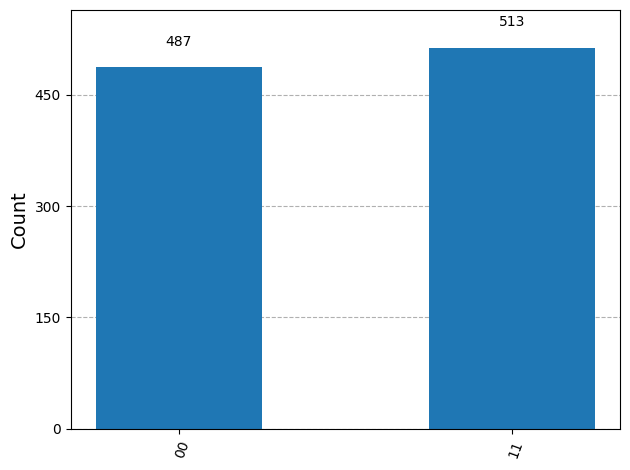

In [ ]:
# Direct Approach
# Simple Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0, 1], [0, 1])

# Run simulation
backend = AerSimulator()
job = backend.run(bell, shots=1000)
counts = job.result().get_counts()

# Display results
print("Bell State Results:")
for state, count in sorted(counts.items()):
    print(f"|{state}>: {count}")

plot_histogram(counts)

In [ ]:
# With Analysis Function
def test_bell_entanglement(shots=1000):
    # Create circuit
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure_all()

    # Run
    sim = AerSimulator()
    result = sim.run(qc, shots=shots).result()
    counts = result.get_counts()

    # Calculate correlation
    correlated = counts.get('00', 0) + counts.get('11', 0)
    print(f"Correlation: {correlated/shots:.2%}")

    return counts

# Test it
test_bell_entanglement()

Correlation: 0.00%


{'11 00': 480, '00 00': 520}

#### **Part C - Build a Depolarizing Noise Model**



##### **Basic Noise Implementation**

In [ ]:
def create_noisy_bell_circuit(p1, p2, shots):
    # Create proper Bell state circuit
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.measure([0, 1], [0, 1])

    # Create noise model
    noise_model = NoiseModel()

    # Single-qubit depolarizing error
    error_1q = depolarizing_error(p1, 1)
    noise_model.add_all_qubit_quantum_error(error_1q, ['h'])

    # Two-qubit depolarizing error
    error_2q = depolarizing_error(p2, 2)
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

    # Run simulation with noise
    backend = AerSimulator(noise_model=noise_model)
    job = backend.run(circuit, shots=shots)
    counts = job.result().get_counts()

    return counts

##### **Testing Different Configurations**

In [ ]:
# Test all required configurations
single_qubit_errors = [0.01, 0.05, 0.1]
two_qubit_errors = [0.01, 0.05, 0.1]
shot_counts = [50, 100, 500]

print("=== NOISE ANALYSIS ===\n")

all_results = []

for p1 in single_qubit_errors:
    for p2 in two_qubit_errors:
        for shots in shot_counts:
            # Run simulation
            counts = create_noisy_bell_circuit(p1, p2, shots)

            # Calculate fidelity (should only have '00', '01', '10', '11')
            total = sum(counts.values())
            correlated = counts.get('00', 0) + counts.get('11', 0)
            fidelity = correlated / total

            # Store results
            result = {
                'p1': p1, 'p2': p2, 'shots': shots,
                'counts': counts, 'fidelity': fidelity
            }
            all_results.append(result)

            print(f"Config: p1={p1}, p2={p2}, shots={shots}")
            print(f"Counts: {counts}")
            print(f"Fidelity: {fidelity:.3f}")
            print(f"Correlated states: {correlated}/{total}\n")

=== NOISE ANALYSIS ===

Config: p1=0.01, p2=0.01, shots=50
Counts: {'00': 20, '11': 30}
Fidelity: 1.000
Correlated states: 50/50

Config: p1=0.01, p2=0.01, shots=100
Counts: {'11': 43, '00': 57}
Fidelity: 1.000
Correlated states: 100/100

Config: p1=0.01, p2=0.01, shots=500
Counts: {'01': 1, '11': 268, '10': 2, '00': 229}
Fidelity: 0.994
Correlated states: 497/500

Config: p1=0.01, p2=0.05, shots=50
Counts: {'10': 2, '00': 25, '01': 1, '11': 22}
Fidelity: 0.940
Correlated states: 47/50

Config: p1=0.01, p2=0.05, shots=100
Counts: {'01': 2, '10': 1, '00': 44, '11': 53}
Fidelity: 0.970
Correlated states: 97/100

Config: p1=0.01, p2=0.05, shots=500
Counts: {'01': 4, '11': 240, '10': 4, '00': 252}
Fidelity: 0.984
Correlated states: 492/500

Config: p1=0.01, p2=0.1, shots=50
Counts: {'01': 1, '11': 29, '10': 1, '00': 19}
Fidelity: 0.960
Correlated states: 48/50

Config: p1=0.01, p2=0.1, shots=100
Counts: {'01': 4, '11': 56, '10': 3, '00': 37}
Fidelity: 0.930
Correlated states: 93/100

Confi

##### **Simple Visualization**

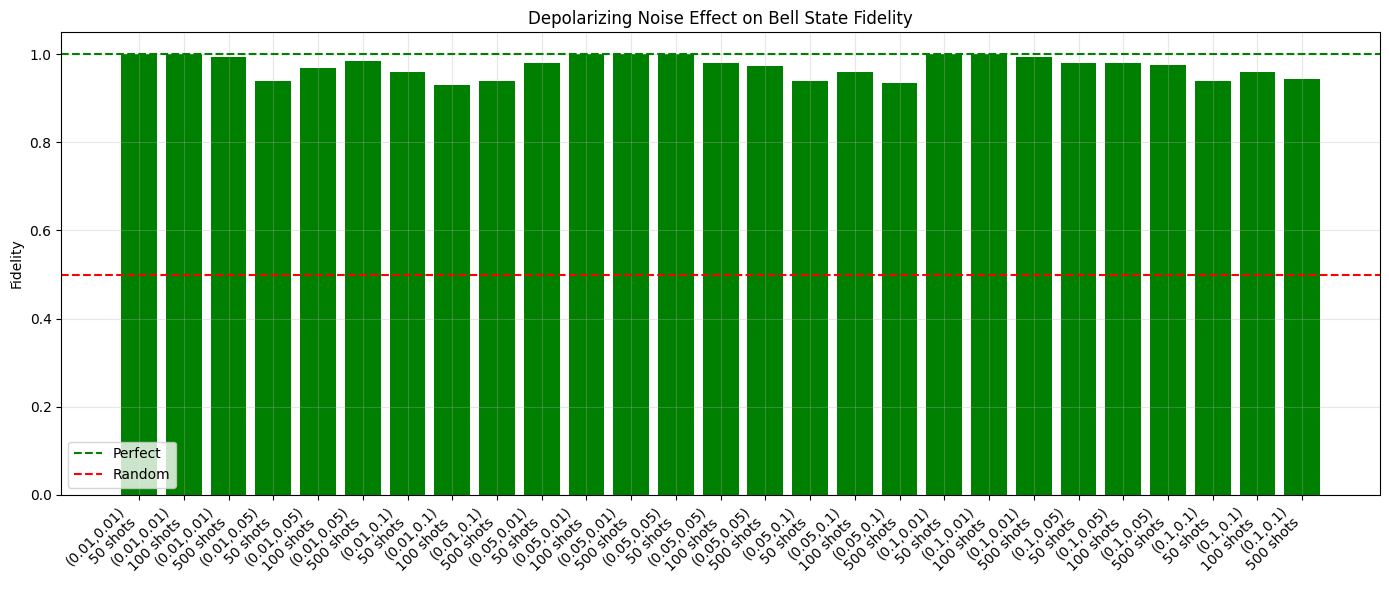


 === SUMMARY ===
Highest fidelity: 1.000
Lowest fidelity: 0.930
Average fidelity: 0.973


In [ ]:
# Visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Create labels and values for bar plot
labels = []
fidelities = []
colors = []

for r in all_results:
    label = f"({r['p1']},{r['p2']})\n{r['shots']} shots"
    labels.append(label)
    fidelities.append(r['fidelity'])

    # Color based on fidelity
    if r['fidelity'] > 0.9:
        colors.append('green')
    elif r['fidelity'] > 0.7:
        colors.append('yellow')
    else:
        colors.append('red')

# Create bar plot
bars = ax.bar(range(len(labels)), fidelities, color=colors)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Fidelity')
ax.set_title('Depolarizing Noise Effect on Bell State Fidelity')
ax.axhline(y=1.0, color='green', linestyle='--', label='Perfect')
ax.axhline(y=0.5, color='red', linestyle='--', label='Random')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n === SUMMARY ===")
print(f"Highest fidelity: {max(fidelities):.3f}")
print(f"Lowest fidelity: {min(fidelities):.3f}")
print(f"Average fidelity: {sum(fidelities)/len(fidelities):.3f}")